# Sheet 2 - Answers

Made by Johannes van de Locht, Anna Beckers and Finn Kalvelage

#  1 Communicating with Interactive Articles

## a)

I picked [To Build a Better Ballot](https://ncase.me/ballot/) as I am interested in different voting systems and see clear disadvantages of some.
The article mostly has drag and drop interactive visualizations of the outcome of different voting systems. One is about first past the post (FPTP) voting, it shows a coordinate system as an abstract of the four political quadrants, a voter and three candidates. All of them can be shifted around to show their political opinion and the differences between them. 
There is a line between the clostest candidate and the voter. The main benefit would be to show how voters will act in a first past the post voting system, this is especially interesting when compared with the other visualizations showing different voting systems.
In my opinion this is already a great visualization as any more information would only clutter it and distract from what the author wants to show.

## b)
 The authors repeatedly highlight findings from psychological and educational research. State two
 such findings, and explain why they are relevant to interactive articles.

One finding from psychological educational research mentioned is about self-reflection. By explaining newly learned information back to themselves they will be more engaged with the topic. Interactive articles enable self-reflection for example through components that make the reader make predicitions about the topic.

Interactive articles also employ content personalization, the text and multimedia is modifyed based on user input or other user specific data. This has been shown to increase engagement and learning. One example would be to take the readers hometown to show the impact of global warming so the reader is more easily able to relate.


## c) 
The New York times became more cautious about using interactive content after they found that only a fraction of readers interact with non-static content. As a result many designers choose not to implement inteactivity.

The creation of interactive articles is a lot more work than "normal" non-interactive articles. As the interactive components are most often coded using web frameworks this makes it difficult for authors without web development experience. As the internet is ever changing the interactive articles are more prone to breaking because of changing web technologies.

Other domains such as science and education could profit from using interaction and its aid in learning, especially with more complex topics. Especially given the fact that there is not a lot of data that shows interactive elements really are underused. Concluding I would say, that even though there is a greater amount of work needed to make interactive content, this can still be beneficial especially in domains such as science and education.

# Task 2

In [3]:
import pandas as pd
import seaborn as sns

a)

In [4]:
df_wide = pd.read_excel("chronic_kidney_disease_numerical.xls")
df_wide.head()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,ckd


In [5]:
df_long = pd.melt(df_wide, id_vars=['class'], value_vars=df_wide.columns)
df_long.head()

,class,variable,value
0,ckd,age,48.0
1,ckd,age,7.0
2,ckd,age,62.0
3,ckd,age,48.0
4,ckd,age,51.0


b)

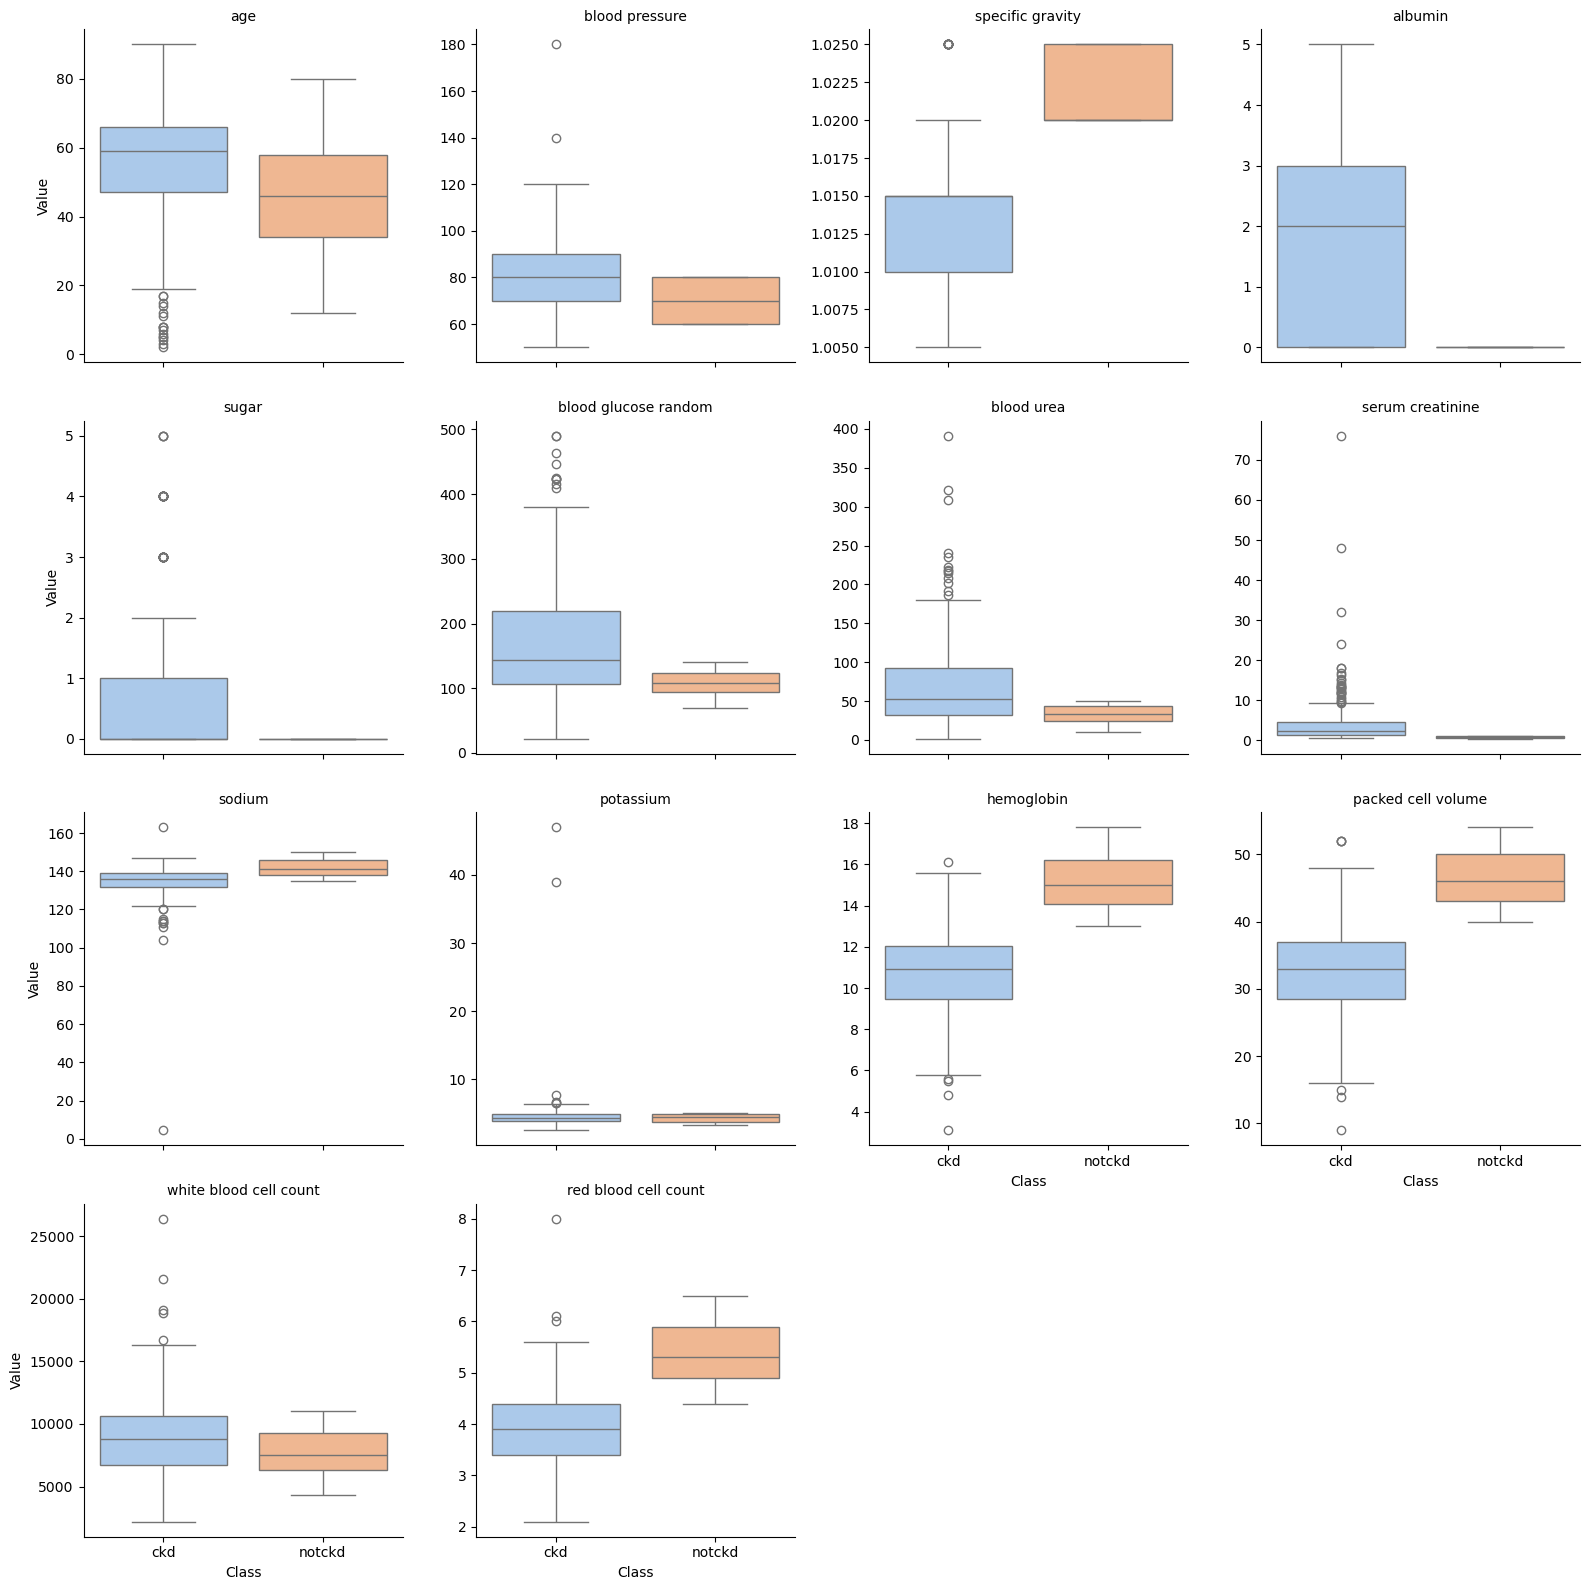

In [7]:
grid = sns.FacetGrid(df_long, col="variable", col_wrap=4, sharey=False, height=4)
grid.map_dataframe(sns.boxplot, x="class", y="value", palette="pastel", hue="class")
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Class", "Value")

c)

One attribute that seems to be highly indicative for chronic kidney disease is the red blood cell count. Here people with a chronic kidney disease appear to have a clearly lower count than those without. In contrast to this the white blood cell count seems mostly unrealated to the disease.

# Task 3

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

a)

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


b)

The range of quality values is 3 to 8


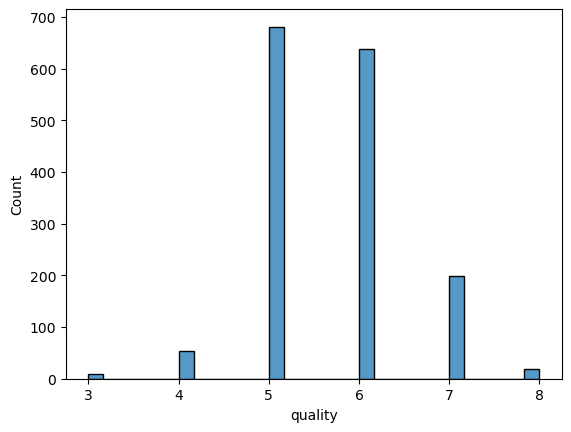

In [ ]:
sns.histplot(df['quality'])
print(f"The range of quality values is {df['quality'].min()} to {df['quality'].max()}")

c)

<Axes: xlabel='quality bin', ylabel='Count'>

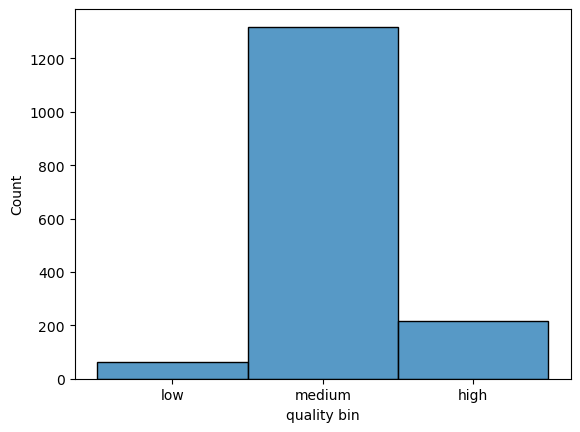

In [ ]:
bins = [3, 5, 7, 9]
labels = ['low', 'medium', 'high']

df['quality bin'] = pd.cut(df['quality'], bins=bins, labels=labels, right=False)
df.drop(columns=['quality'], inplace=True)
sns.histplot(df['quality bin'])

d)

In [ ]:
df_filtered = df[df['quality bin'].isin(['low', 'high'])].reset_index(drop=True)
df_filtered.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality bin
0,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,high
1,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,high
2,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,high
3,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,low
4,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,high


e)

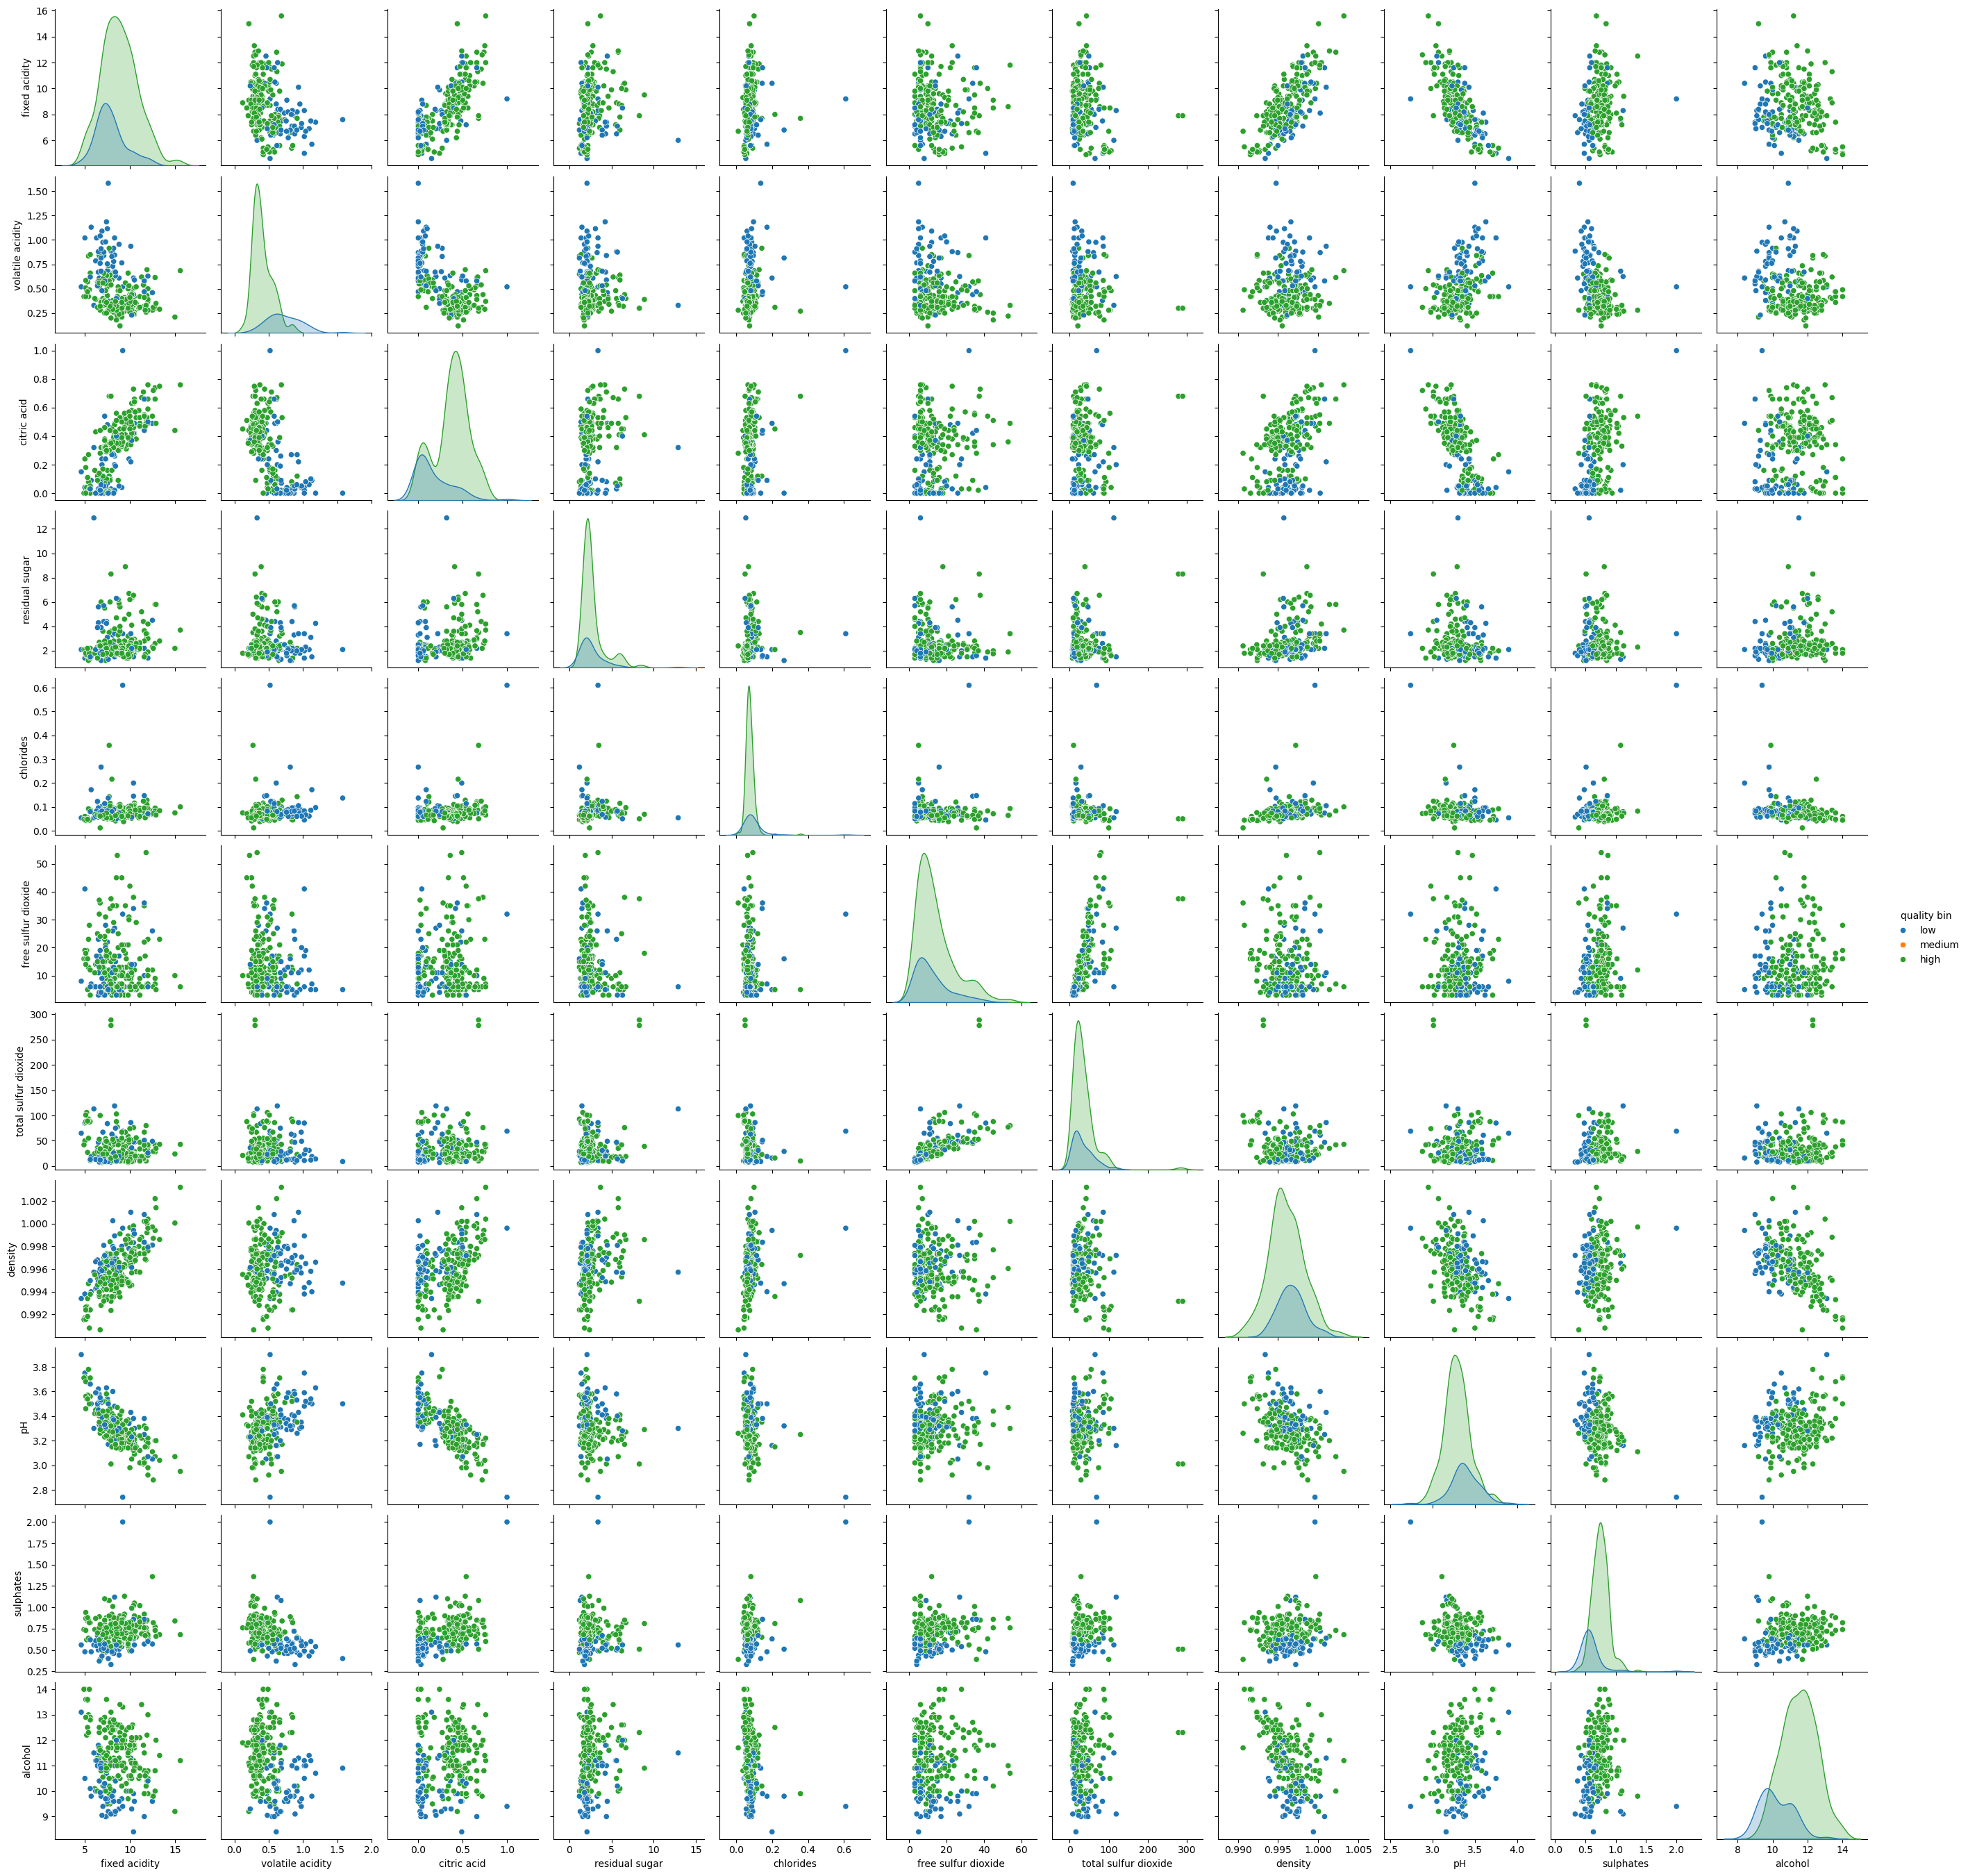

In [ ]:
sns.pairplot(df_filtered, hue="quality bin")

f)

The five attributes that visually seem to be best are: fixed acidity, volatile acidity, citrid acid, sulphates and alcohol. For these attributes there seem to be clear boundaries between the two classes.

g)

In [ ]:
data = df_filtered.drop(columns=['quality bin'])
qualities = df_filtered['quality bin']
feat_selector = SelectKBest(score_func=f_classif, k=5)
data_new = feat_selector.fit_transform(data, qualities)
selected_features = data.columns[feat_selector.get_support()]
print("Top 5 features:", selected_features.values)

Top 5 features: ['volatile acidity' 'citric acid' 'pH' 'sulphates' 'alcohol']


In [ ]:
df_top_columns = pd.DataFrame(data_new, columns=selected_features)
df_top_columns['quality bin'] = df_filtered['quality bin'].cat.remove_unused_categories()
df_top_columns.head()

,volatile acidity,citric acid,pH,sulphates,alcohol,quality bin
0,0.65,0.00,3.39,0.47,10.0,high
1,0.58,0.02,3.36,0.57,9.5,high
2,0.28,0.56,3.30,0.75,10.5,high
3,0.59,0.08,3.38,0.50,9.0,low
4,0.38,0.28,3.23,0.73,9.7,high


h)

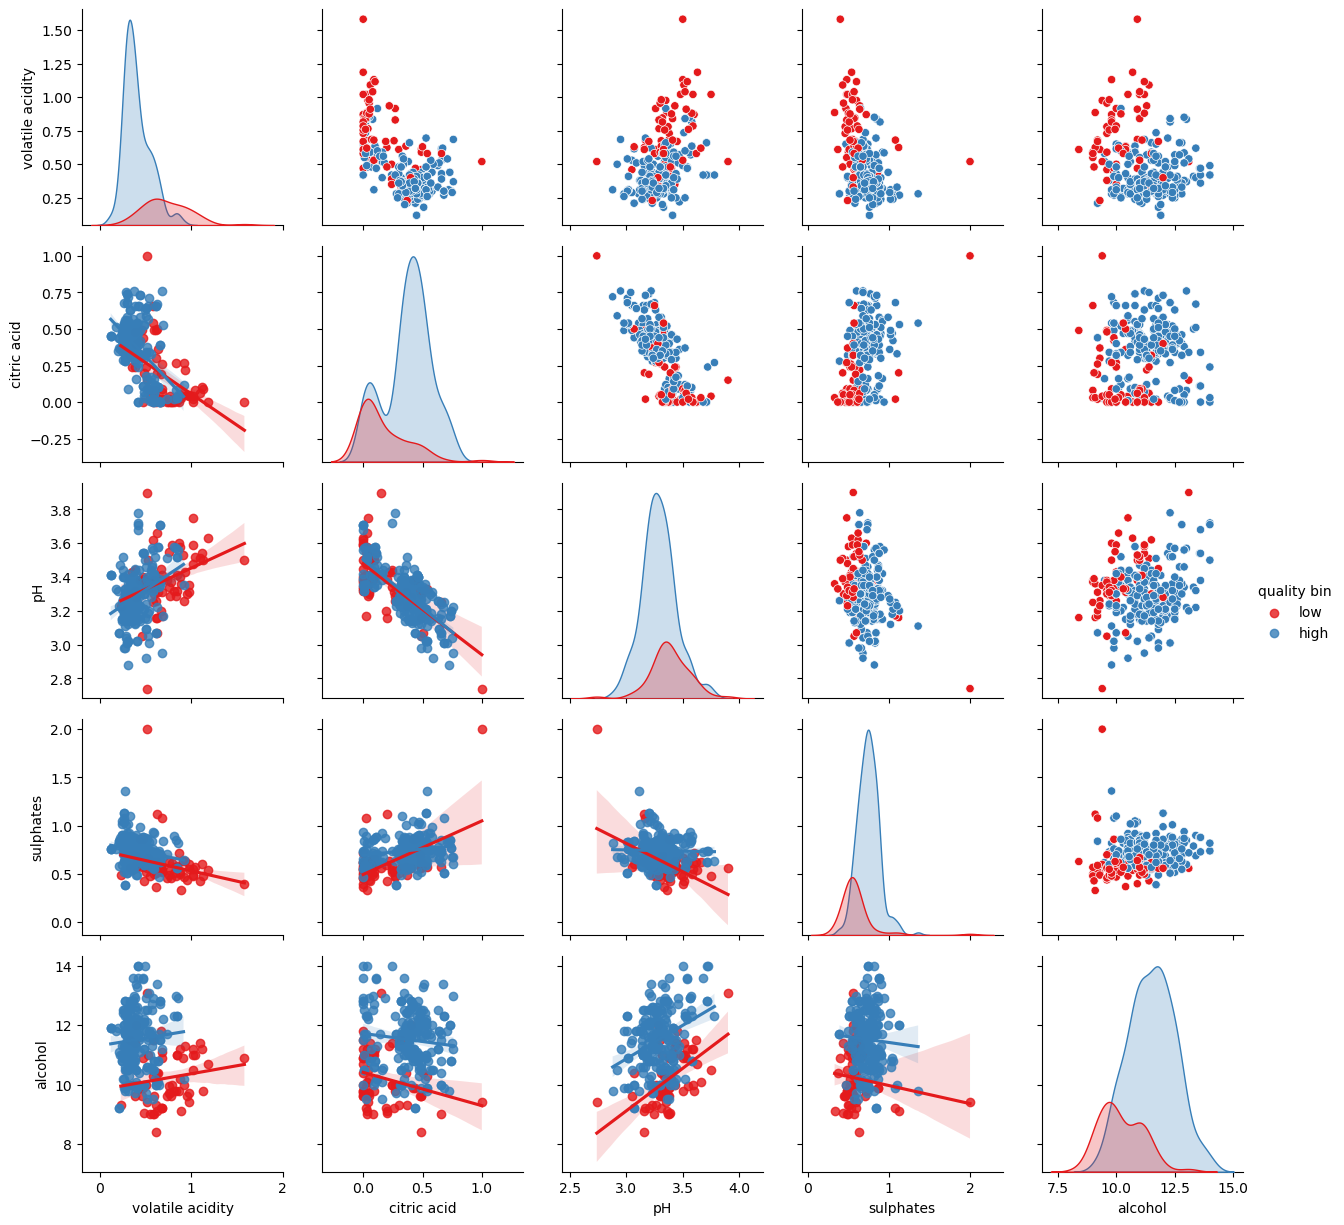

In [ ]:
vis_mat = sns.PairGrid(df_top_columns, diag_sharey=False, hue="quality bin", palette="Set1")
vis_mat.map_upper(sns.scatterplot)
vis_mat.map_lower(sns.regplot)
vis_mat.map_diag(sns.kdeplot, fill=True)
vis_mat.add_legend()

i)

(ph, citric acidity) and (ph, alcohol) seem to be attribute pairs that are strongly correlated regardless of quality.

On the other hand, looking at the scatterplot, it looks like volatile acidity and alcohol are correlated for low quality wine but not for high quality ones. 

Lastly, citric acid seems to have a multimodal distribution.

An example for an outlier is the datapoint with index 13 in df_top_columns. This point has a value of 2 for sulphates and lies outside the cluster of every attribute combination.

In [ ]:
df_top_columns.iloc[13]

volatile acidity    0.52
citric acid          1.0
pH                  2.74
sulphates            2.0
alcohol              9.4
quality bin          low
Name: 13, dtype: object

j)

In [ ]:
def distance_consistency(data_low, data_high):
    center_low = np.sum(data_low, axis=0) / len(data_low)
    center_high = np.sum(data_high, axis=0) / len(data_high)
    low_centered = np.linalg.norm(data_low - center_low, axis=1)
    high_centered = np.linalg.norm(data_high - center_high, axis=1)
    dist_high_center = np.linalg.norm(data_low - center_high, axis=1)
    dist_low_center = np.linalg.norm(data_high - center_low, axis=1)
    
    count_closer_low = np.sum(low_centered < dist_high_center)
    count_closer_high = np.sum(high_centered < dist_low_center)
    dsc = 100 * ((count_closer_low + count_closer_high) / (len(data_low) + len(data_high)))
    return dsc

In [ ]:
data_low_quality = df_top_columns[df_top_columns['quality bin'] == 'low'].drop(columns=['quality bin']).reset_index(drop=True)
data_high_quality = df_top_columns[df_top_columns['quality bin'] == 'high'].drop(columns=['quality bin']).reset_index(drop=True)

In [ ]:
for i, first_column in enumerate(data_low_quality.columns):
    for j, second_column in enumerate(data_low_quality.columns):
        if i < j:
            data_low_pair = data_low_quality.iloc[:, [i, j]].values
            data_high_pair = data_high_quality.iloc[:, [i, j]].values
            dist_cons = distance_consistency(data_low_pair, data_high_pair)
            print(f"The attribute pair {first_column, second_column} has a distance consistency of {dist_cons}")

The attribute pair ('volatile acidity', 'citric acid') has a distance consistency of 77.85714285714286
The attribute pair ('volatile acidity', 'pH') has a distance consistency of 81.42857142857143
The attribute pair ('volatile acidity', 'sulphates') has a distance consistency of 83.92857142857143
The attribute pair ('volatile acidity', 'alcohol') has a distance consistency of 73.21428571428571
The attribute pair ('citric acid', 'pH') has a distance consistency of 76.07142857142857
The attribute pair ('citric acid', 'sulphates') has a distance consistency of 77.14285714285715
The attribute pair ('citric acid', 'alcohol') has a distance consistency of 73.57142857142858
The attribute pair ('pH', 'sulphates') has a distance consistency of 79.64285714285714
The attribute pair ('pH', 'alcohol') has a distance consistency of 71.78571428571429
The attribute pair ('sulphates', 'alcohol') has a distance consistency of 71.78571428571429


As can be seen from the ouput the pair of 'volatile acidity' and 'sulphates' leads to the highest distance consistency (approximately 84%).